In [10]:
import string
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

In [11]:
data = pd.read_csv("test.csv")
data.head()

,datetime,username,content,id,sentiment,annotator,annotation_id,created_at,updated_at,lead_time
0,2019-01-17 07:07:08+00:00,Analis_News,"Diperiksa Polisi, Ivan Gunawan Tetap Ceria \n#...",7000,Positive,1,7000,2022-09-14T13:52:43.588067Z,2022-09-14T13:52:43.588067Z,1.289
1,2019-01-17 07:28:32+00:00,detikcom,"Asistennya, AJA ditangkap polisi karena narkob...",6999,Positive,1,6999,2022-09-14T13:52:41.876341Z,2022-09-14T13:52:41.876341Z,0.902
2,2019-01-17 08:00:45+00:00,bayunurizky,"RT detikcom ""Asistennya, AJA ditangkap polisi ...",6998,Positive,1,6998,2022-09-14T13:52:40.545073Z,2022-09-14T13:52:40.545073Z,3.798
3,2019-01-17 08:00:56+00:00,foomarketer,"Asistennya, AJA ditangkap polisi karena narkob...",6997,Positive,1,6997,2022-09-14T13:52:36.314071Z,2022-09-14T13:52:36.314071Z,1.842
4,2019-01-17 08:03:13+00:00,Analis_News,"Usai Diperiksa Polisi, Ini Hasil Tes Urine Iva...",6996,Positive,1,6996,2022-09-14T13:52:34.093155Z,2022-09-14T13:52:34.093155Z,1.891


In [12]:
import re
def casefolding(content):
    content = content.lower()
    content = content.strip(" ")
    content = re.sub(r'[?|.|!_:")(-+,]','', content)
    return content
data['content'] = data['content'].apply(casefolding)
data.head(100)

,datetime,username,content,id,sentiment,annotator,annotation_id,created_at,updated_at,lead_time
0,2019-01-17 07:07:08+00:00,Analis_News,diperiksa polisi ivan gunawan tetap ceria \n#j...,7000,Positive,1,7000,2022-09-14T13:52:43.588067Z,2022-09-14T13:52:43.588067Z,1.289
1,2019-01-17 07:28:32+00:00,detikcom,asistennya aja ditangkap polisi karena narkoba...,6999,Positive,1,6999,2022-09-14T13:52:41.876341Z,2022-09-14T13:52:41.876341Z,0.902
2,2019-01-17 08:00:45+00:00,bayunurizky,rt detikcom asistennya aja ditangkap polisi ka...,6998,Positive,1,6998,2022-09-14T13:52:40.545073Z,2022-09-14T13:52:40.545073Z,3.798
3,2019-01-17 08:00:56+00:00,foomarketer,asistennya aja ditangkap polisi karena narkoba...,6997,Positive,1,6997,2022-09-14T13:52:36.314071Z,2022-09-14T13:52:36.314071Z,1.842
4,2019-01-17 08:03:13+00:00,Analis_News,usai diperiksa polisi ini hasil tes urine ivan...,6996,Positive,1,6996,2022-09-14T13:52:34.093155Z,2022-09-14T13:52:34.093155Z,1.891
...,...,...,...,...,...,...,...,...,...,...
95,2019-04-07 03:33:30+00:00,indrabektiasli,audisi papi kepulauan seribu batch 2 dimulai \...,6905,Negative,1,6905,2022-09-14T13:33:40.058817Z,2022-09-14T13:33:40.058817Z,1.382
96,2019-04-09 02:13:02+00:00,jpnncom,ivan gunawan enggan memberi komentar terkait d...,6904,Positive,1,6904,2022-09-14T13:33:38.256564Z,2022-09-14T13:33:38.256564Z,1.214
97,2019-04-10 02:37:32+00:00,NyataTabloid,aseeek udah didukung nih apakah ini pertanda k...,6903,Positive,1,6903,2022-09-14T13:33:36.598756Z,2022-09-14T13:33:36.598756Z,1.782
98,2019-04-10 04:01:02+00:00,jpnncom,meski tidak menjawab secara gamblang ivan guna...,6902,Positive,1,6902,2022-09-14T13:33:34.381833Z,2022-09-14T13:33:34.382822Z,2.610


In [13]:
def token (content):
    nstr = content.split(' ')
    dat=[]
    a = -1
    for hu in nstr:
        a = a+1
    if hu == '':
        dat.append(a)
    p = 0
    b = 0
    for q in dat:
        b = q-p
        del nstr[b]
        p = p + 1
    return nstr
data['content'] = data['content'].apply(token)
data.head(10)

,datetime,username,content,id,sentiment,annotator,annotation_id,created_at,updated_at,lead_time
0,2019-01-17 07:07:08+00:00,Analis_News,"[diperiksa, polisi ivan, gunawan, tetap, ceria...",7000,Positive,1,7000,2022-09-14T13:52:43.588067Z,2022-09-14T13:52:43.588067Z,1.289
1,2019-01-17 07:28:32+00:00,detikcom,"[asistennya, aja, ditangkap, polisi, karena, n...",6999,Positive,1,6999,2022-09-14T13:52:41.876341Z,2022-09-14T13:52:41.876341Z,0.902
2,2019-01-17 08:00:45+00:00,bayunurizky,"[rt, detikcom, asistennya, aja, ditangkap, pol...",6998,Positive,1,6998,2022-09-14T13:52:40.545073Z,2022-09-14T13:52:40.545073Z,3.798
3,2019-01-17 08:00:56+00:00,foomarketer,"[asistennya, aja, ditangkap, polisi, karena, n...",6997,Positive,1,6997,2022-09-14T13:52:36.314071Z,2022-09-14T13:52:36.314071Z,1.842
4,2019-01-17 08:03:13+00:00,Analis_News,"[usai, diperiksa, polisi, ini, hasil, tes, uri...",6996,Positive,1,6996,2022-09-14T13:52:34.093155Z,2022-09-14T13:52:34.093155Z,1.891
5,2019-01-17 08:20:02+00:00,jpnncom,"[asisten, ditangkap, polisi, ivan, gunawan, sa...",6995,Positive,1,6995,2022-09-14T13:52:31.805322Z,2022-09-14T13:52:31.805322Z,3.119
6,2019-01-17 08:21:07+00:00,pantau_com,"[jalani, pemeriksaan, hasil, tes, urine, ivan,...",6994,Positive,1,6994,2022-09-14T13:52:28.300946Z,2022-09-14T13:52:28.300946Z,2.260
7,2019-01-17 08:28:18+00:00,Starpro_id,"[setelah, aris, idol, hari, ini, giliran, pres...",6993,Positive,1,6993,2022-09-14T13:52:25.655405Z,2022-09-14T13:52:25.655405Z,3.339
8,2019-01-17 09:17:48+00:00,NyataTabloid,"[respons, #ivangunawan, usai, asistennya, dita...",6992,Positive,1,6992,2022-09-14T13:52:21.893513Z,2022-09-14T13:52:21.893513Z,2.607
9,2019-01-17 09:54:13+00:00,detikcom,"[polisi, menyatakan, urine, ivan, negatif, nar...",6991,Positive,1,6991,2022-09-14T13:52:18.837689Z,2022-09-14T13:52:18.837689Z,5.039


In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def stopword_removal(content):
    filtering = stopwords.words('indonesian', 'english')
    x = []
    data = []
    def myFunc(x):
        if x in filtering:
            return False
        else:
            return True
    fit = filter(myFunc, content)
    for x in fit:
        data.append(x)
    return data
data['content'] = data['content'].apply(stopword_removal)
data.head() 

[nltk_data] Downloading package stopwords to C:\Users\Hanif
[nltk_data]     Rimamtomo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,datetime,username,content,id,sentiment,annotator,annotation_id,created_at,updated_at,lead_time
0,2019-01-17 07:07:08+00:00,Analis_News,"[diperiksa, polisi ivan, gunawan, ceria, \n#ja...",7000,Positive,1,7000,2022-09-14T13:52:43.588067Z,2022-09-14T13:52:43.588067Z,1.289
1,2019-01-17 07:28:32+00:00,detikcom,"[asistennya, aja, ditangkap, polisi, narkoba, ...",6999,Positive,1,6999,2022-09-14T13:52:41.876341Z,2022-09-14T13:52:41.876341Z,0.902
2,2019-01-17 08:00:45+00:00,bayunurizky,"[rt, detikcom, asistennya, aja, ditangkap, pol...",6998,Positive,1,6998,2022-09-14T13:52:40.545073Z,2022-09-14T13:52:40.545073Z,3.798
3,2019-01-17 08:00:56+00:00,foomarketer,"[asistennya, aja, ditangkap, polisi, narkoba, ...",6997,Positive,1,6997,2022-09-14T13:52:36.314071Z,2022-09-14T13:52:36.314071Z,1.842
4,2019-01-17 08:03:13+00:00,Analis_News,"[diperiksa, polisi, hasil, tes, urine, ivan, g...",6996,Positive,1,6996,2022-09-14T13:52:34.093155Z,2022-09-14T13:52:34.093155Z,1.891


In [ ]:
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(content):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in content: 
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean=[]
    d_clean= " ".join(do)
    print(d_clean)
    return d_clean

data['content'] = data['content'].apply(stemming)
data.to_csv('data_clean.csv', index=False)

periksa polisi ivan gunawan ceria jakarta ivangunawan kokain polresmetrojakbar https tco et7sjmgmt4
asisten aja tangkap polisi narkoba ivan gunawan panggil periksa saksi agenda ivangunawan  https tco p70v27bvvy
rt detikcom asisten aja tangkap polisi narkoba ivan gunawan panggil periksa saksi agenda ivangunawan  https tco jrhxzuwwfh
asisten aja tangkap polisi narkoba ivan gunawan panggil periksa saksi agenda ivangunawan  https tco hiibbnyd0l
periksa polisi hasil tes urine ivan gunawan jakarta ivangunawan kasusnarkoba kokainbelanda https tco wp761dvlyy
asisten tangkap polisi ivan gunawan takut ya ivangunawan https tco qi86zlpzug
jalan periksa hasil tes urine ivan gunawan negatif https tco jef0esvdmt pantaucom ivangunawan kasusnarkoba artisnarkoba
aris idol gilir presenter kondang ivan gunawan panggil polisi periksa tes urin kait tangkap asisten pribadi ivan gunawan andre jordan alatas jerat barang haram narkoba starproindonesia mii mnc tvshow ivangunawan https tco zw6fkww7ns
respons ivan

In [ ]:
data_clean = pd.read_csv('data_clean.csv',encoding='latin1')
data_clean.head()

In [ ]:
data_clean = data_clean.astype({'sentiment': 'category'})
data_clean = data_clean.astype({'content': 'string'})
data_clean.dtypes

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['content'].astype('U'))
text_tf

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_tf, data_clean['content'], test_size=0.2, random_state = 42)

print("Number transaction X_train dataset : ", X_train.shape)
print("Number transaction X_test dataset : ", X_test.shape)
print("Number transaction y_train dataset : ", y_train.shape)
print("Number transaction y_test dataset : ", y_test.shape)

Number transaction X_train dataset :  (800, 3720)
Number transaction X_test dataset :  (201, 3720)
Number transaction y_train dataset :  (800,)
Number transaction y_test dataset :  (201,)


In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix

# elf = KNeighborsClassifier(n_neighbors=5, weights='distance').fit(X_train, y_train)
# predicted = elf.predict(X_test)
# print("KNN Accuracy: ", accuracy_score(y_test,predicted))
# print("KNN Precision: ", precision_score(y_test,predicted, average='macro', pos_label="negative"))
# print("KNN Recall: ", recall_score(y_test,predicted, average='macro', pos_label="negative"))
# print("KNN f1_score: ", f1_score(y_test,predicted, average='macro', pos_label="negative"))

# print (f'confusionn matrix:\n {confusion_matrix(y_test, predicted)}')
# print('==============================================n')
print(classification_report(y_test, predicted, zero_division = 0))

                                                                                                                                                                                                                                                                                            precision    recall  f1-score   support

                                                                                                                                                                                                                                                                     anak ken panggil anak       0.00      0.00      0.00         1
                                                                                                                                                                                                                                 dapat gimana cewe confess duluan cowo sender confess ragu       0.00      0.00      0.00         1
                           

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
                                                                                                                                                                                                                                                                                            precision    recall  f1-score   support

                                                                                                                                                                                                                                                             10 buah qrt wujud 1 menit ovt       0.00      0.00      0.00       0.0
                                                                                                                                                                                                                                       

c:\Users\Hanif Rimamtomo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hanif Rimamtomo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hanif Rimamtomo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
 

In [ ]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

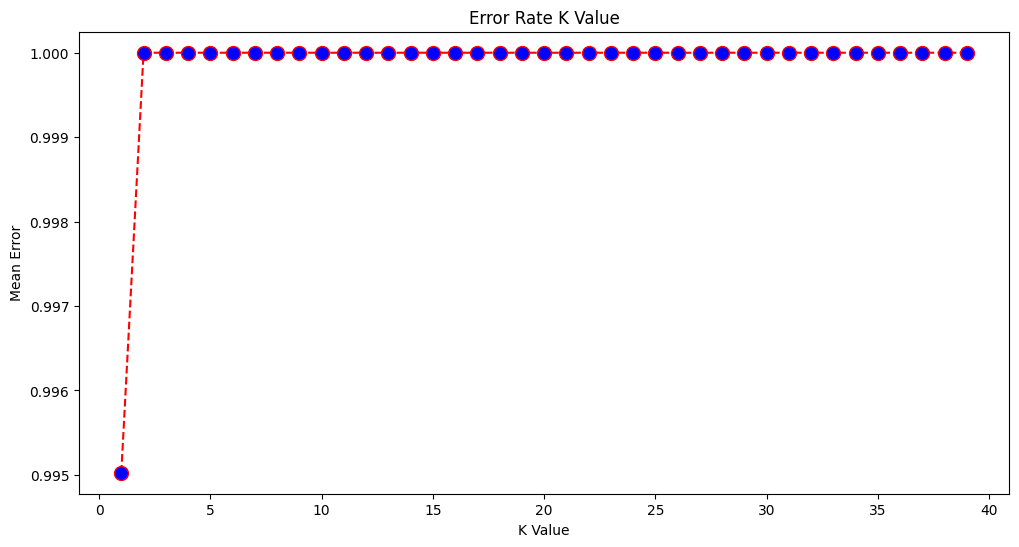

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')